In [5]:
import requests
import pandas as pd
from pprint import pprint
from PIL import Image
import IPython
from IPython.display import display
import urllib.request
from io import BytesIO 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
url = 'https://api.nasa.gov/planetary/earth/imagery'

In [6]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
def extract_image_features(image):
    image = image.resize((224, 224))  # Resize the image to fit the model
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = vgg_model.predict(img_array)
    return features.flatten()  # Flatten to a 1D array for input to a model

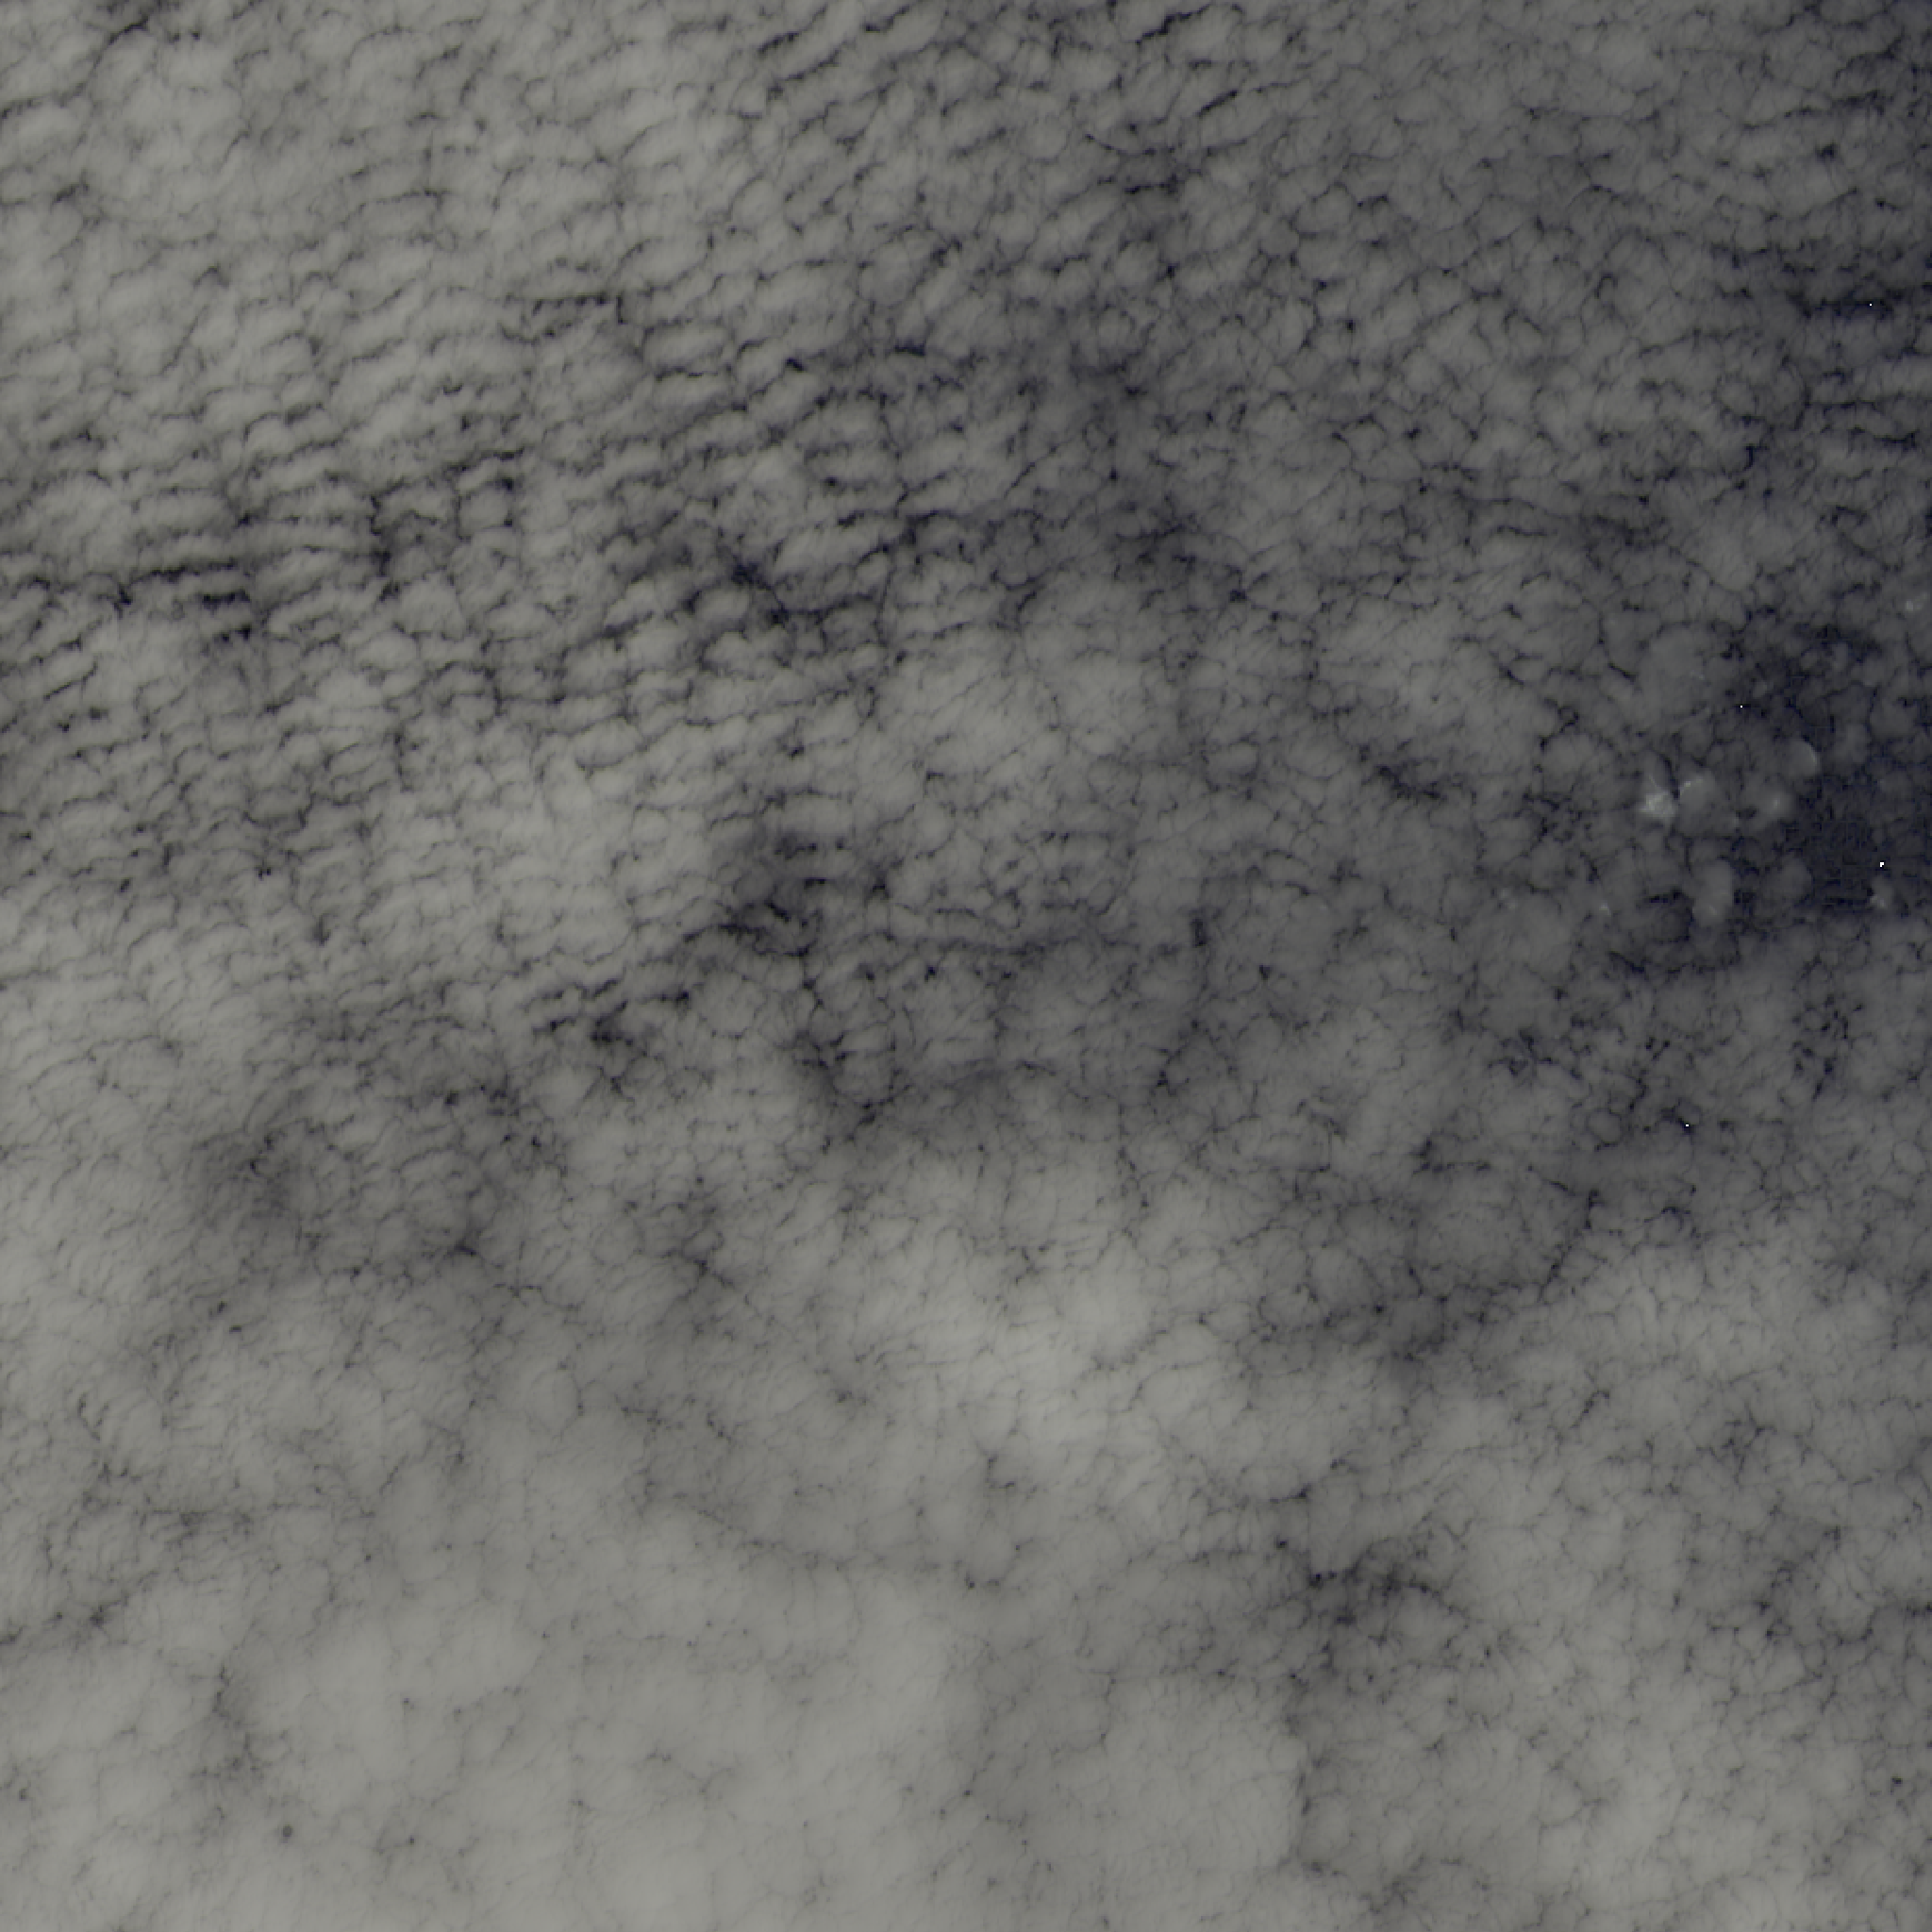

In [4]:
try:
    # Send the request to the API
    response = requests.get(url, params=params)
    
    image = Image.open(BytesIO(response.content))
    display(image)
            
except Exception as e:
    print(f"An error occurred: {e}")